'''Optuna is a framework designed for automation and acceleration of optimization studies.'''

# Table of Content

* Import Library and Data

* Data Preprocessing
    * Feature Enginnering
    * Handling Missing Values
    * Label Encoder
    * Handling Imbalanced Dataset using(SMOTE with Tomek Link)

* EDA
    * Correlation between categorical Variable & Target
    * Correlation between numerical Variable & Target

* Building & Evaluating Logistic Regression Model

* Building & Evaluating Random Forest Model

* Building & Evaluating XGBoost Model

* Comparison Between LR,RF,BGB

* App Deployement

In [53]:
!pip install -qqq optuna

# Import Data and Library




In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import xgboost as xgb
import optuna

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [55]:
data1="/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
def data(file_path):
  return pd.read_csv(file_path)
df=data(data1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [56]:
df.drop("customerID", axis=1 ,inplace =True)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [58]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [59]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


* Feature engineering

Tenure Group

In [60]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

TotalCharges per Tenure

In [61]:
df['ChargesPerMonth'] = df['TotalCharges'] / df['tenure']


Contract and PaymentMethod

In [62]:
df['Contract_PaymentInteraction'] = df['Contract'] + '_' + df['PaymentMethod']

Has Phone And Internet

In [63]:
df['HasPhoneAndInternet'] = np.where((df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No'), 1, 0)

Number of services

In [64]:
df['NumServices'] = ((df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies']] == 'Yes') |
                          (df['InternetService'].isin(['DSL', 'Fiber optic']))).sum(axis=1)

Filling Missing Values

In [65]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [66]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mode()[0])

In [67]:
df["ChargesPerMonth"] = df["ChargesPerMonth"].fillna(df["ChargesPerMonth"].median())

In [68]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [69]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0-1 year,29.850000,Month-to-month_Electronic check,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,2-4 years,55.573529,One year_Mailed check,1,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-1 year,54.075000,Month-to-month_Mailed check,1,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,40.905556,One year_Bank transfer (automatic),0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0-1 year,75.825000,Month-to-month_Electronic check,1,1


LABEL ENCODER

In [70]:
list_of_non_numerical = df.select_dtypes(exclude=['int64', 'float64']).columns # Catch categecores coulumns
print("Non-numerical columns in training set:", list(list_of_non_numerical))

Non-numerical columns in training set: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureGroup', 'Contract_PaymentInteraction']


In [71]:
label_encoder = LabelEncoder()
for col in list_of_non_numerical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# EDA

In [72]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

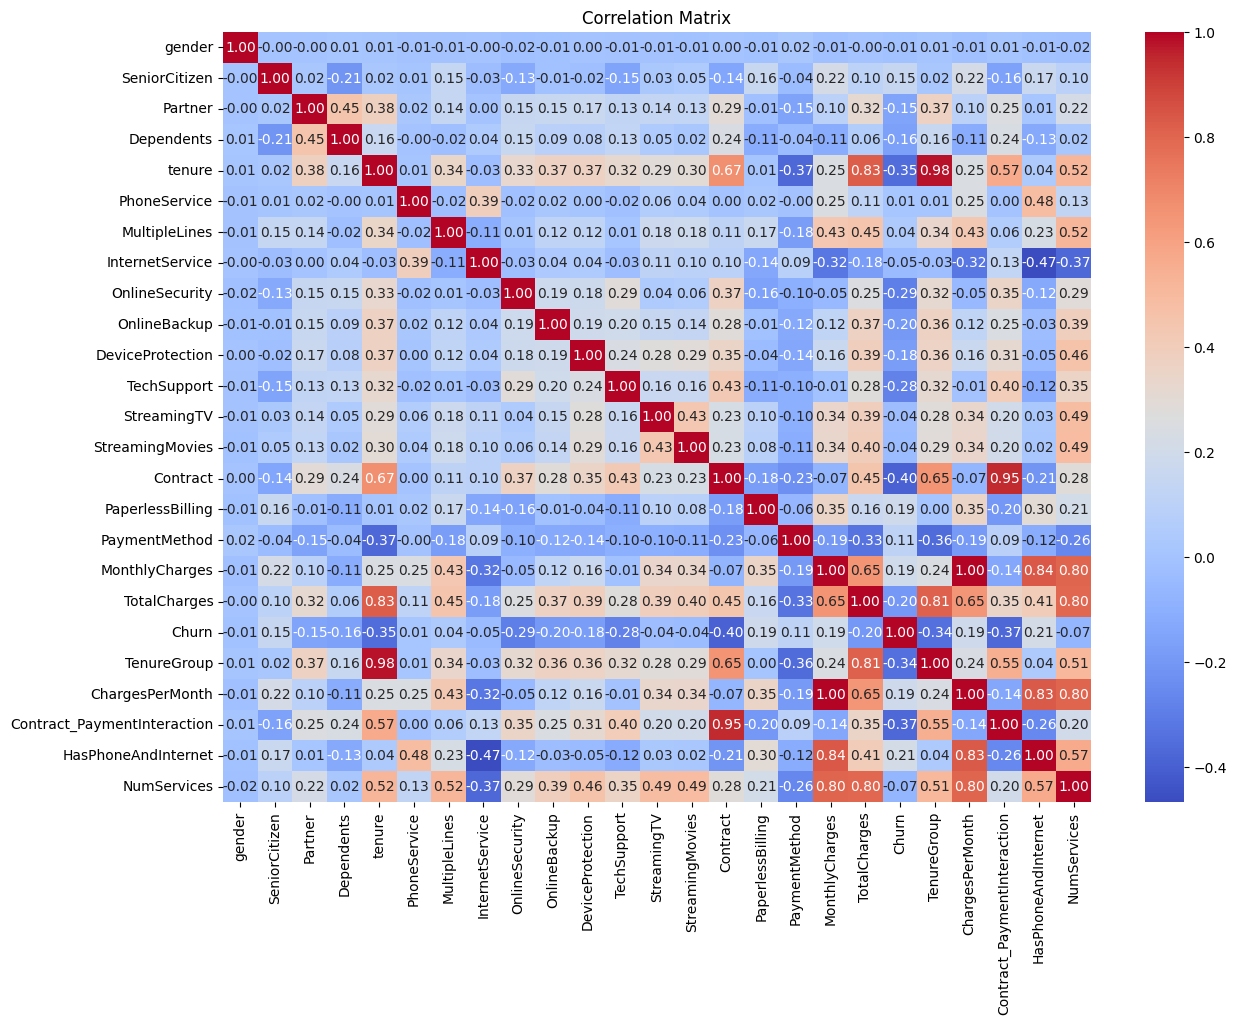

In [73]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* Tenure,TenureGroup,TotalCharg,Contracte are correlated
* Montlycharges,chargespermonth are correlated
* contract,contract_paymentinteraction are coorelated
There are new variable that are created by previous existing variable so they our coorelated has meaning.

In [74]:
global_mean = np.round(df['Churn'].mean(), 2)

In [75]:
exclude_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

render_limit = 16  # Limit the number of figures becaues it crash in colab and kaggle
counter = 0

for feature in df.columns:
    if feature in exclude_columns or feature == 'Churn':
        continue

    df_group = df.groupby(by=feature)['Churn'].mean().reset_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_group[feature],
        y=df_group['Churn'],
        marker=dict(
            color=df_group['Churn'],
            colorscale='Viridis',
            colorbar=dict(title='Churn Rate')
        ),
        text=df_group['Churn'].round(2),
        textposition='auto',
    ))

    fig.add_shape(
        type='line',
        x0=df_group[feature].min(), x1=df_group[feature].max(),
        y0=global_mean, y1=global_mean,
        line=dict(color='red', width=3, dash='dot')
    )

    fig.add_annotation(
        x=df_group[feature].min() + (df_group[feature].max() - df_group[feature].min()) * 0.05,
        y=global_mean + 0.05,
        text=f'Global Mean: {global_mean}',
        showarrow=True,
        arrowhead=2,
        font=dict(color='red', size=14, family='Arial'),
        bgcolor='rgba(255, 255, 255, 0.7)'
    )

    fig.update_layout(
        title=f'Churn Rate by {feature}',
        xaxis_title=feature,
        yaxis_title='Churn Rate',
        xaxis=dict(tickvals=df_group[feature], ticktext=df_group[feature].astype(int)),
        template='plotly_dark',
        title_font=dict(size=20, family='Arial', color='white'),
        xaxis_title_font=dict(size=14, family='Arial', color='white'),
        yaxis_title_font=dict(size=14, family='Arial', color='white')
    )

    if counter < render_limit:
        fig.show()
        counter += 1
    else:
        break

In [76]:
df.drop(['gender'], axis=1, inplace=True)

** "Payment Method" has the highest value, suggesting that it is the most influential feature in predicting churn.


** "Senior Citizen" has a very low chi-squared value, indicating that it is not a significant predictor of churn.

** By examining the chi-squared values, we can identify the features that are most likely to be important in building a model to predict customer churn. These features can be used to develop more accurate and effective churn prediction models.

In [77]:
print(df['Churn'].unique())

[0 1]


In [78]:
df.Churn.value_counts()

,count
Churn,
0,5174
1,1869


* Correlation with Numerical Features with Churn

In [79]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

correlations = {}
for col in num_columns:
    correlation = df[col].corr(df['Churn'])
    correlations[col] = correlation

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

fig = go.Figure()

fig.add_trace(go.Bar(
    x=correlation_df['Feature'],
    y=correlation_df['Correlation'],
    marker_color=['#FF6347', '#4682B4', '#32CD32'],
    text=correlation_df['Correlation'].round(2),
    textposition='auto'
))


fig.update_layout(
    title='Correlation with Numerical Features with Churn',
    xaxis_title='Feature',
    yaxis_title='Correlation Coefficient',
    template='plotly_white',
    xaxis=dict(tickmode='linear')
)

fig.show()

* Tenure-A negative correlation between tenure and Churn.This could indicate that customer loyalty increases with time.
* MonthlyCharges- There's a positive correlation between MonthlyCharges and Churn, suggesting that customers paying higher monthly fees are more likely to churn.
* TotalCharges- higher total charges might contribute to churn



# Handling Imbalanced Dataset

In [80]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [81]:
from imblearn.under_sampling import TomekLinks

* Tomek Links: Tomek links are pairs of instances (samples) from different classes that are each other's nearest neighbors. The concept is used to clean datasets by removing borderline or noisy instances, which can help improve the performance of machine learning models.

In [82]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

In [83]:
df_smote.shape

(9981, 24)

In [84]:
X = df_smote.drop(['Churn'], axis=1)
y = df_smote['Churn']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* StandardScaler- It scales the data to have a mean of 0 and a standard deviation of 1, which can improve the performance of many algorithms.

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X = scaler.fit_transform(X)

# Logistic Regression

In [88]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test) #Threshold
y_prob_log = log_model.predict_proba(X_test)[:, 1] #[:, 1] gives u the probability of class 1

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

print("Logistic Regression MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression MODEL
Accuracy: 0.8300500834724541
ROC-AUC: 0.918659409278778


** The AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

**High Accuracy (83%): The model is performing well in terms of overall correctness, meaning it correctly classifies a large majority of the instances.
**High ROC-AUC (92%): The model is also excellent at distinguishing between the classes, indicating it has a good balance between sensitivity (true positive rate) and specificity (true negative rate).


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1568
           1       0.81      0.85      0.83      1427

    accuracy                           0.83      2995
   macro avg       0.83      0.83      0.83      2995
weighted avg       0.83      0.83      0.83      2995



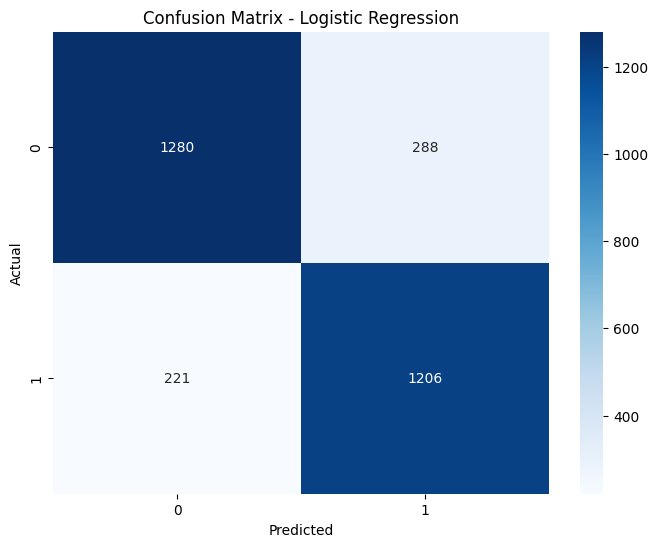

In [89]:
print("Classification Report")
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [90]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_log, y=tpr_log,
    mode='lines',
    line=dict(color='orange', width=2),
    name=f'ROC Curve (AUC = {roc_auc_log:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# Random Forest

In [92]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2024-11-09 13:15:29,251] A new study created in memory with name: no-name-8c18bb5d-75f0-438a-9796-f338a8c3a2c4
[I 2024-11-09 13:15:51,633] Trial 0 finished with value: 0.8378209795566424 and parameters: {'n_estimators': 396, 'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 10, 'bootstrap': True}. Best is trial 0 with value: 0.8378209795566424.
[I 2024-11-09 13:15:58,267] Trial 1 finished with value: 0.8459800942751841 and parameters: {'n_estimators': 156, 'max_depth': 41, 'min_samples_split': 19, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 0.8459800942751841.
[I 2024-11-09 13:16:10,221] Trial 2 finished with value: 0.8422580370976842 and parameters: {'n_estimators': 304, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 7, 'bootstrap': True}. Best is trial 1 with value: 0.8459800942751841.
[I 2024-11-09 13:16:15,470] Trial 3 finished with value: 0.8541392089937256 and parameters: {'n_estimators': 101, 'max_depth': 23, 'min_samples_s

{'n_estimators': 279, 'max_depth': 48, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}


  The best result is{'n_estimators': 307, 'max_depth': 47, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False}

In [93]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators= 307,max_depth= 47,min_samples_split= 4,min_samples_leaf= 1,bootstrap= False)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

print("Random Forest MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_forest))

Random Forest MODEL
Accuracy: 0.8574290484140233
ROC-AUC: 0.9335793926891008


**High Accuracy (86%): The Random Forest model is performing well in terms of overall correctness, classifying a large majority of instances correctly.
**High ROC-AUC (93%): The model excels at distinguishing between the classes, showing a strong balance between sensitivity (true positive rate) and specificity (true negative rate).

classification report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1568
           1       0.85      0.85      0.85      1427

    accuracy                           0.86      2995
   macro avg       0.86      0.86      0.86      2995
weighted avg       0.86      0.86      0.86      2995



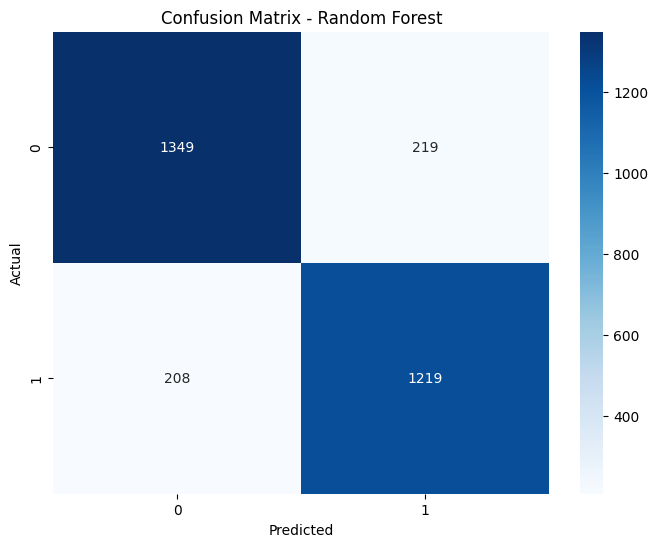

In [94]:
print("classification report")
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# XGBoost

In [95]:
xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

print("XGBOOST MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
XGBOOST MODEL
Accuracy: 0.8537562604340567
ROC-AUC: 0.9368130836777598


High Accuracy (85%): The Random Forest model is performing well in terms of overall correctness, classifying a large majority of instances correctly.
High ROC-AUC (93%): The model excels at distinguishing between the classes, showing a strong balance between sensitivity (true positive rate) and specificity (true negative rate).

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1568
           1       0.84      0.86      0.85      1427

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.85      0.85      0.85      2995



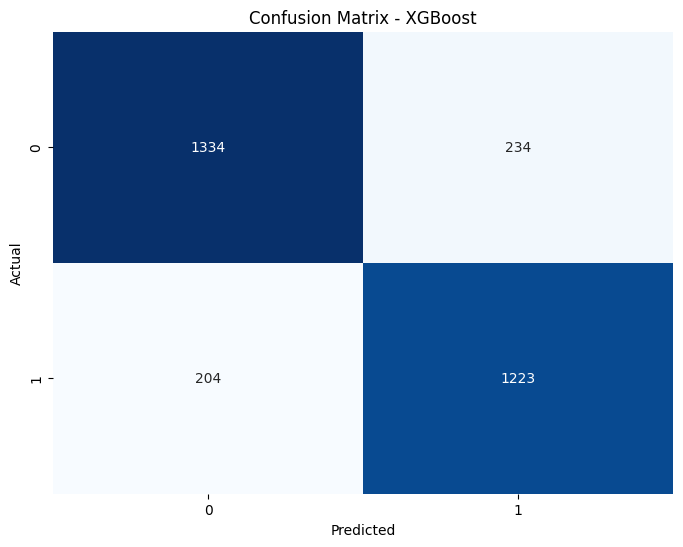

In [96]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [97]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    line=dict(color='red', width=2),
    name='ROC Curve'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# Comparision

In [98]:
models = ['XGBoost', 'Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_forest)
]
fig_acc = go.Figure()
fig_acc.add_trace(go.Bar(
    x=models,
    y=accuracies,
    marker_color='royalblue',
    text=[f'{acc:.2f}' for acc in accuracies],
    textposition='auto'
))
fig_acc.update_layout(
    title='Model Accuracy Comparison',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    template='plotly_dark'
)
fig_acc.show()

In [99]:
roc_auc_scores = [
    roc_auc_score(y_test, y_prob_xgb),
    roc_auc_score(y_test, y_prob_log),
    roc_auc_score(y_test, y_prob_forest)
]
fig_auc = go.Figure()
fig_auc.add_trace(go.Bar(
    x=models,
    y=roc_auc_scores,
    marker_color='darkorange',
    text=[f'{auc:.2f}' for auc in roc_auc_scores],
    textposition='auto'
))
fig_auc.update_layout(
    title='Model ROC-AUC Comparison',
    xaxis_title='Model',
    yaxis_title='ROC-AUC Score',
    template='plotly_dark'
)
fig_auc.show()

# APP Deployment

In [100]:
import joblib

In [101]:
joblib.dump(forest_model , 'forest_model.pkl')

['forest_model.pkl']

In [102]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [103]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [104]:
!pip install gradio
import gradio as gr
import joblib
import numpy as np

# Load the trained Logistic Regression model
log_model = joblib.load('forest_model.pkl')

# Define a function that uses the loaded model to make predictions
def classify_object(
    SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines,
    InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
    StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod,
    MonthlyCharges, TotalCharges, TenureGroup, ChargesPerMonth,
    Contract_PaymentInteraction, HasPhoneAndInternet, NumServices
):
    # Prepare the input data as a NumPy array (23 features)
    input_data = np.array([[SeniorCitizen, Partner, Dependents, tenure, PhoneService,
                            MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
                            DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
                            Contract, PaperlessBilling, PaymentMethod, MonthlyCharges,
                            TotalCharges, TenureGroup, ChargesPerMonth,
                            Contract_PaymentInteraction, HasPhoneAndInternet, NumServices]])

    # Get predicted probabilities for both classes
    probabilities = log_model.predict_proba(input_data)

    # Use np.argmax to get the class with the highest probability
    predicted_class = np.argmax(probabilities, axis=1)

    # Map prediction to label
    labels = {0: "YES", 1: "NO"}  # Map model output to class names
    return labels[predicted_class[0]]

# Create a Gradio interface with inputs for all 23 features
app_interface = gr.Interface(
    fn=classify_object,  # Function to use for predictions
    inputs=[
        gr.Number(label="SeniorCitizen"),                # SeniorCitizen
        gr.Number(label="Partner"),                      # Partner
        gr.Number(label="Dependents"),                   # Dependents
        gr.Number(label="Tenure (months)"),              # Tenure
        gr.Number(label="PhoneService"),                 # PhoneService
        gr.Number(label="MultipleLines"),                # MultipleLines
        gr.Number(label="InternetService"),              # InternetService
        gr.Number(label="OnlineSecurity"),               # OnlineSecurity
        gr.Number(label="OnlineBackup"),                 # OnlineBackup
        gr.Number(label="DeviceProtection"),             # DeviceProtection
        gr.Number(label="TechSupport"),                  # TechSupport
        gr.Number(label="StreamingTV"),                  # StreamingTV
        gr.Number(label="StreamingMovies"),              # StreamingMovies
        gr.Number(label="Contract"),                     # Contract
        gr.Number(label="PaperlessBilling"),             # PaperlessBilling
        gr.Number(label="PaymentMethod"),                # PaymentMethod
        gr.Number(label="Monthly Charges"),              # MonthlyCharges
        gr.Number(label="Total Charges"),                # TotalCharges
        gr.Number(label="TenureGroup"),                  # TenureGroup
        gr.Number(label="ChargesPerMonth"),              # ChargesPerMonth
        gr.Number(label="Contract_PaymentInteraction"),  # Contract_PaymentInteraction
        gr.Number(label="HasPhoneAndInternet"),          # HasPhoneAndInternet
        gr.Number(label="NumServices")                   # NumServices
    ],
    outputs=gr.Textbox(label="Churn Prediction"),  # Output
    title="Churn Prediction Classifier",
    description="Enter customer details to predict churn (Yes/No)"
)

# Launch the app
app_interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
Running 